**Problems 1 and 2**

In [100]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [101]:
pathname = "/Users/tengyaolong/Desktop/NTU_DataScience_Lab/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(pathname);
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [103]:
#new_df with only int 64
new_df = df.select_dtypes(include='int64')

In [104]:
#note that we have also dropped float64 types, which could still be numeric but who cares since the qn told us to do that
new_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [105]:
numeric_data = new_df.drop(['Id','MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', \
                            'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces',\
                            'MiscVal', 'MoSold','YrSold', 'BedroomAbvGr', 'KitchenAbvGr'], axis=1)
numeric_data.columns

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [106]:
numeric_data

,LotArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,8450,150,856,0,1710,1,0,2,1,2,548,0,61,0,0,0,0,208500
1,9600,284,1262,0,1262,0,1,2,0,2,460,298,0,0,0,0,0,181500
2,11250,434,920,0,1786,1,0,2,1,2,608,0,42,0,0,0,0,223500
3,9550,540,756,0,1717,1,0,1,0,3,642,0,35,272,0,0,0,140000
4,14260,490,1145,0,2198,1,0,2,1,3,836,192,84,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,953,0,1647,0,0,2,1,2,460,0,40,0,0,0,0,175000
1456,13175,589,1542,0,2073,1,0,2,0,2,500,349,0,0,0,0,0,210000
1457,9042,877,1152,0,2340,0,0,2,0,1,252,0,60,0,0,0,0,266500
1458,9717,0,1078,0,1078,1,0,1,0,1,240,366,0,112,0,0,0,142125


In [107]:
numeric_data.describe()

,LotArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,567.240411,1057.429452,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,180921.195890
std,9981.264932,441.866955,438.705324,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,79442.502883
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,9478.500000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,11601.500000,808.000000,1298.250000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,215245.000000,2336.000000,6110.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,755000.000000


In [108]:
numeric_data.median()

LotArea            9478.5
BsmtUnfSF           477.5
TotalBsmtSF         991.5
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
SalePrice        163000.0
dtype: float64

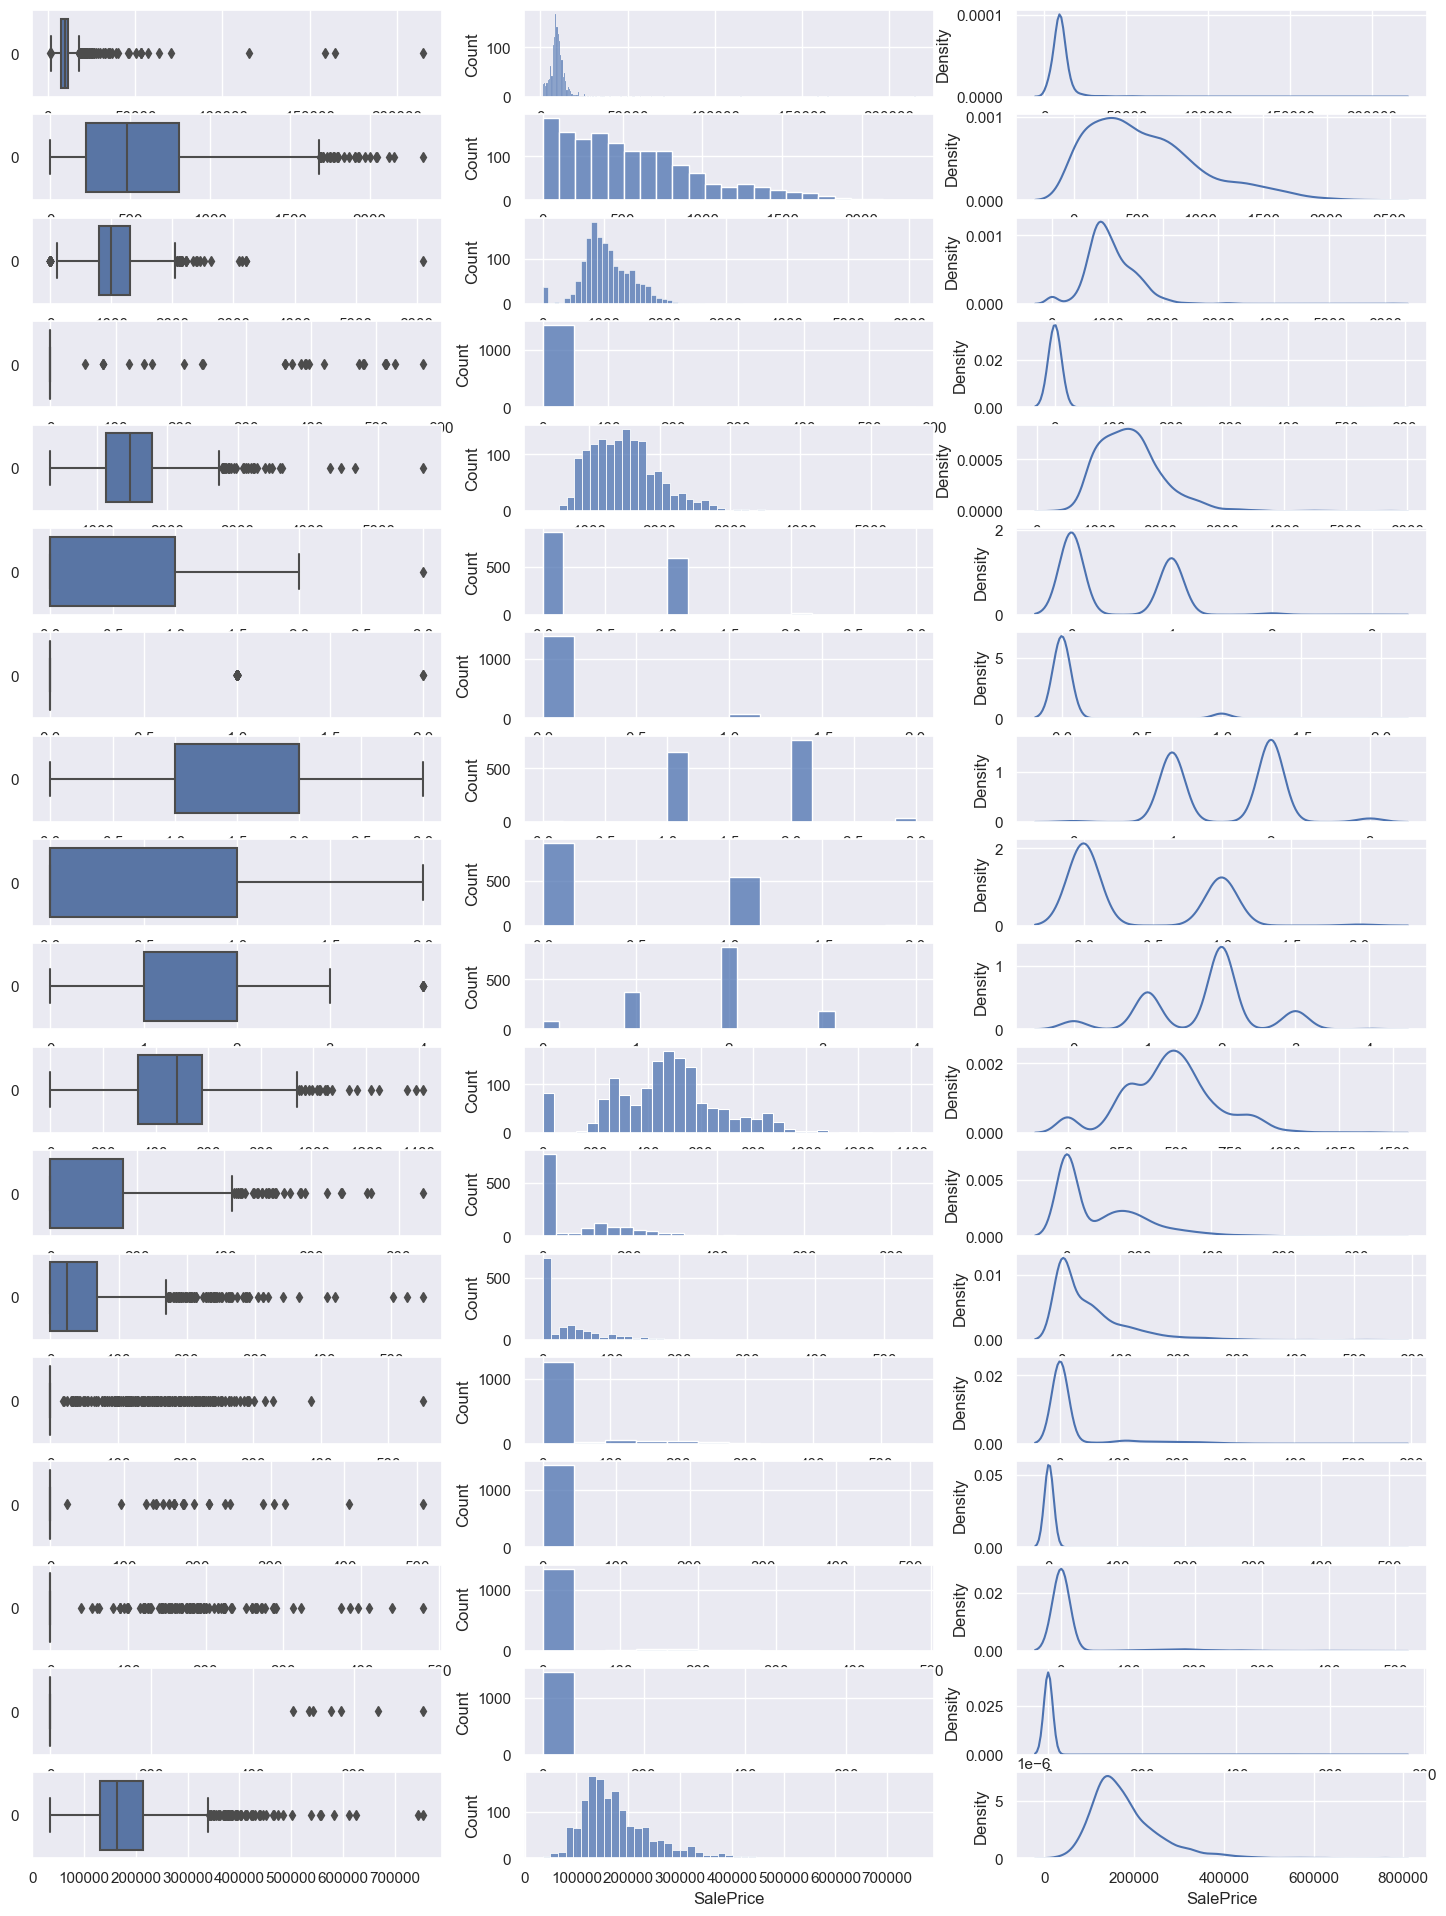

In [109]:
#just plotting everything for fun first
f, axes = plt.subplots(18, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.kdeplot(data = numeric_data[var], ax = axes[count,2])
    count += 1

plt.show()

In [110]:
numeric_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [111]:
numeric_data['SalePrice'].median()

163000.0

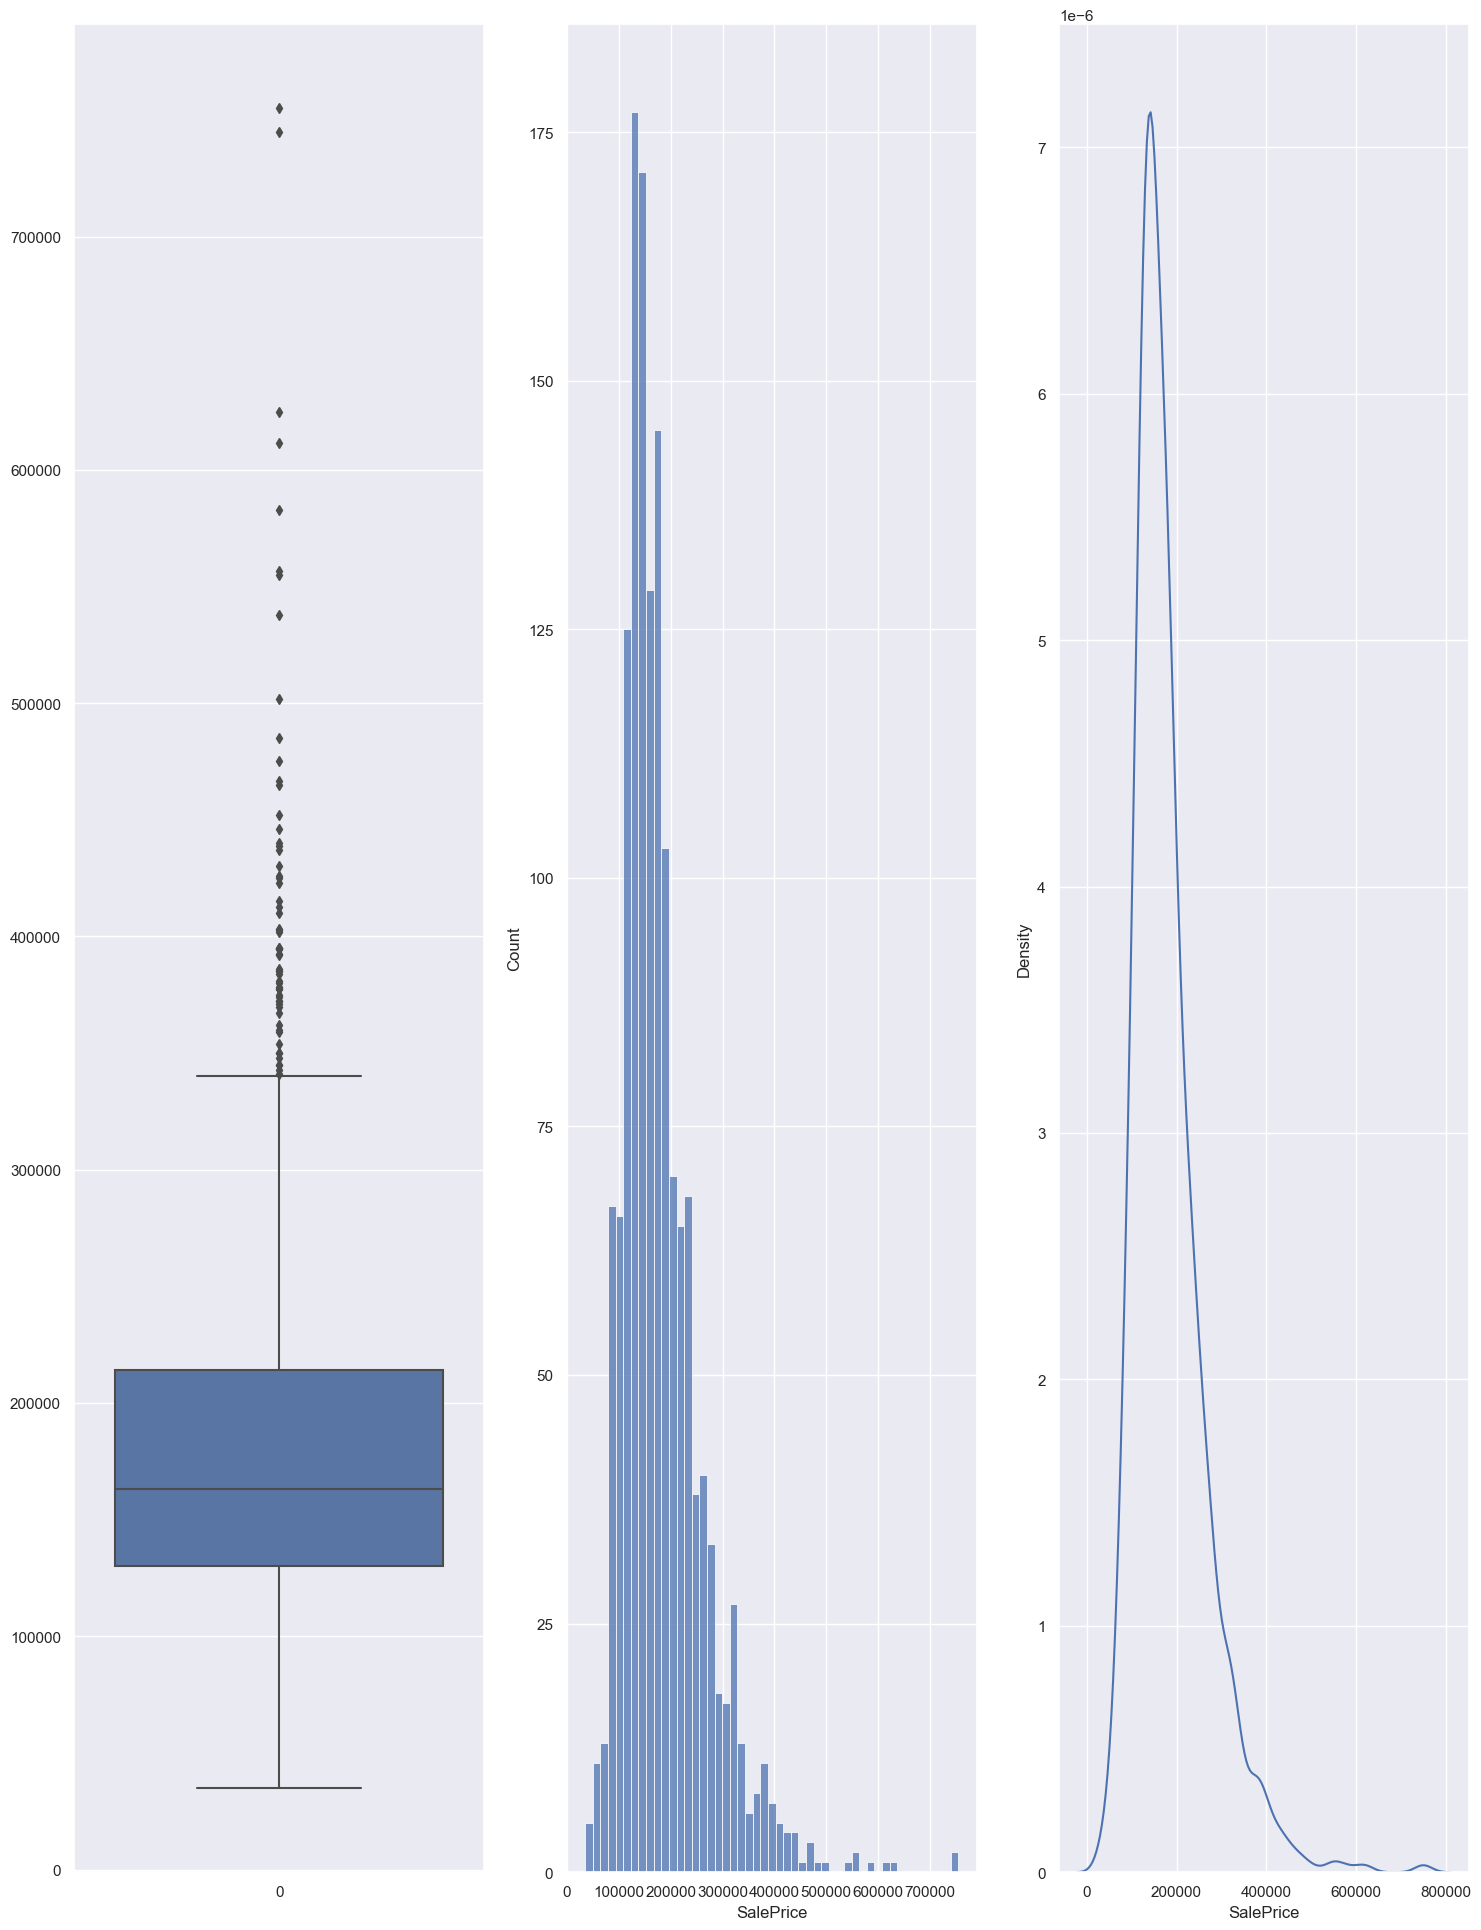

In [112]:

f1, axes1 = plt.subplots(1, 3, figsize=(18, 24))

sb.boxplot(data = numeric_data['SalePrice'], ax=axes1[0], orient='v')
sb.histplot(data = numeric_data['SalePrice'], ax=axes1[1])
sb.kdeplot(data = numeric_data['SalePrice'], ax=axes1[2])
plt.show()

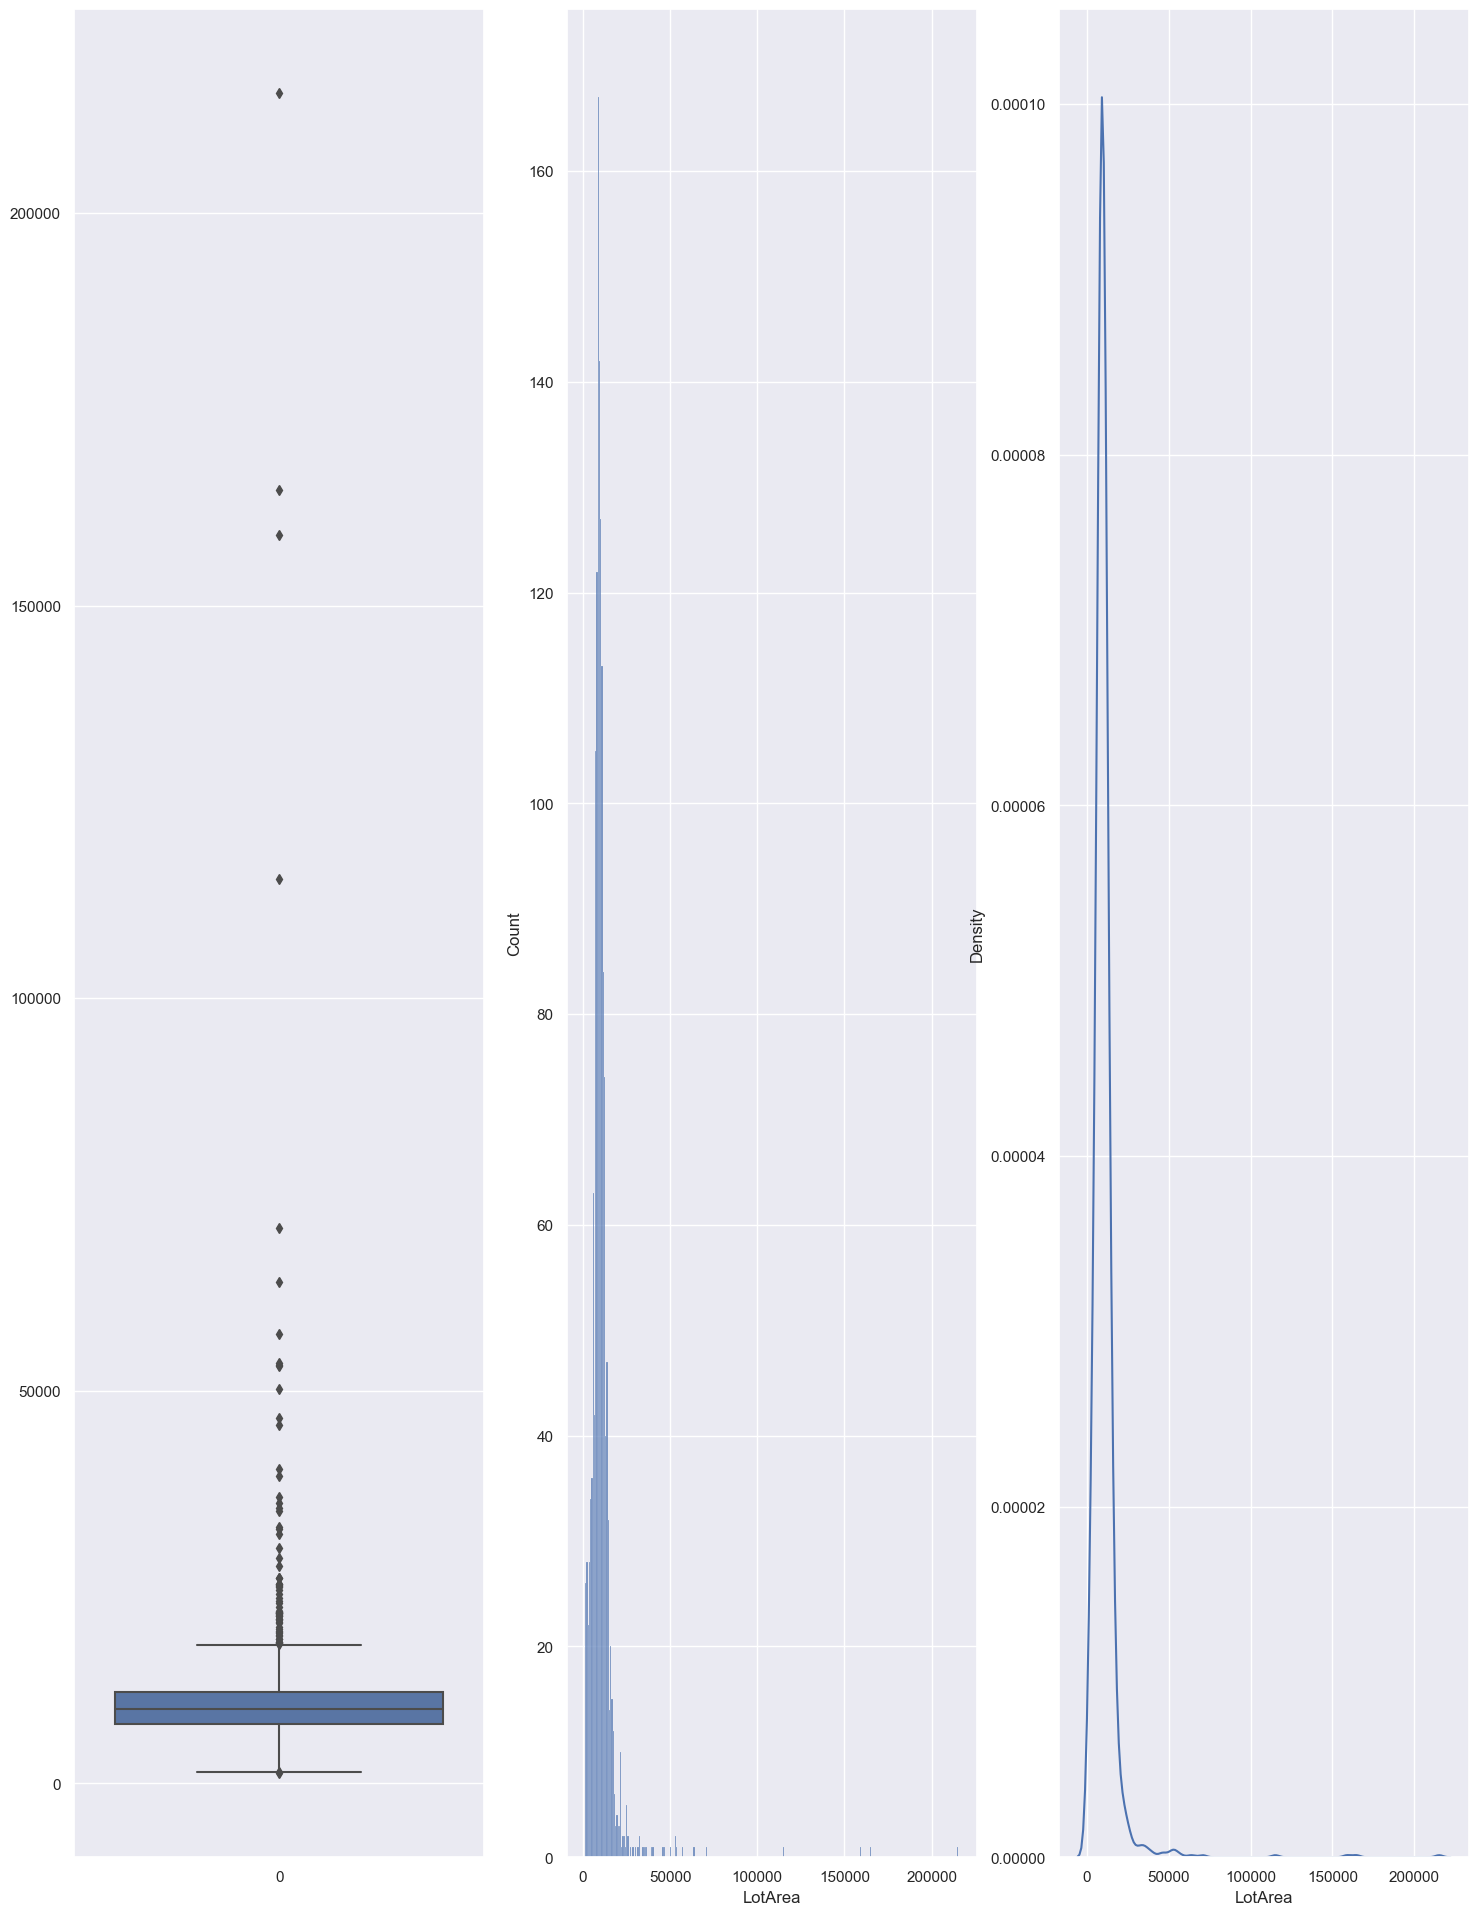

In [113]:
plt.close()
f1, axes1 = plt.subplots(1, 3, figsize=(18, 24))

sb.boxplot(data = numeric_data['LotArea'], ax=axes1[0], orient='v')
sb.histplot(data = numeric_data['LotArea'], ax=axes1[1])
sb.kdeplot(data = numeric_data['LotArea'], ax=axes1[2])
plt.show()

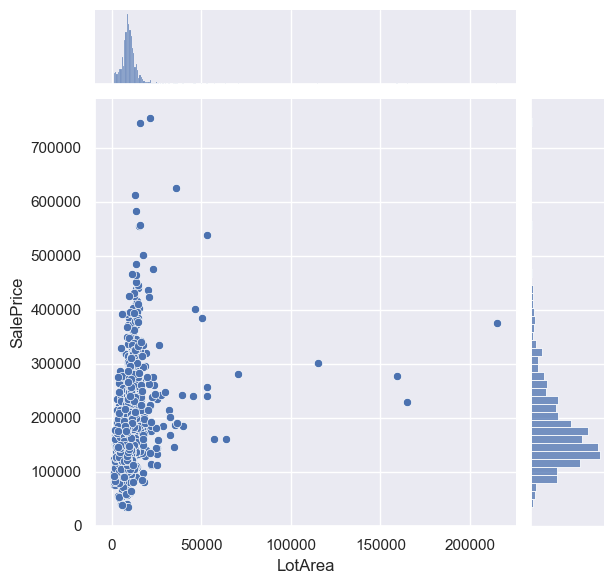

In [114]:
plt.close()
sb.jointplot(data=numeric_data, x='LotArea', y='SalePrice')
plt.show()

In [115]:
var1 = numeric_data['LotArea']
var2 = numeric_data['SalePrice']
var1.corr(var2)

0.26384335387140556

In [116]:
#new_df with only int 64
new_df1 = df.select_dtypes(include=['int64', 'float64'])
new_df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [117]:
for i in new_df1.columns:
    print(i, new_df1[i].dtype)

Id int64
MSSubClass int64
LotFrontage float64
LotArea int64
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
TotRmsAbvGrd int64
Fireplaces int64
GarageYrBlt float64
GarageCars int64
GarageArea int64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
3SsnPorch int64
ScreenPorch int64
PoolArea int64
MiscVal int64
MoSold int64
YrSold int64
SalePrice int64


In [118]:
# as we can see, GarageYrBlt is float64 but categorical
numeric_data1 = new_df1.drop(['Id','MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', \
                            'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces',\
                            'MiscVal', 'MoSold','YrSold', 'GarageYrBlt', 'BedroomAbvGr', 'KitchenAbvGr'], axis=1)
numeric_data1.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [126]:
numeric_data1.columns.tolist()

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice']

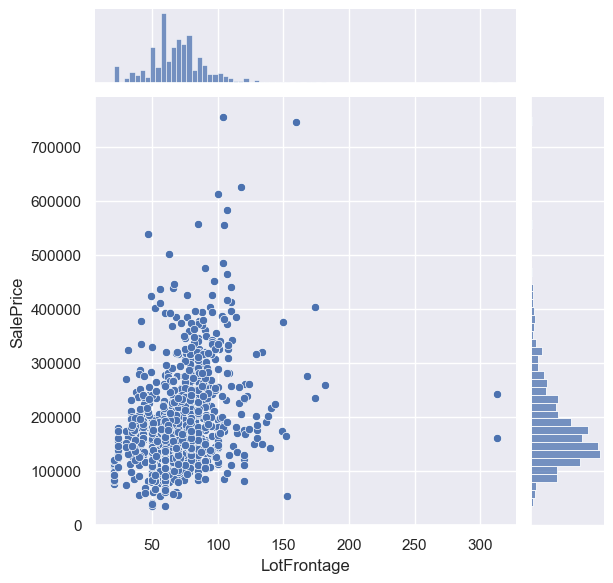

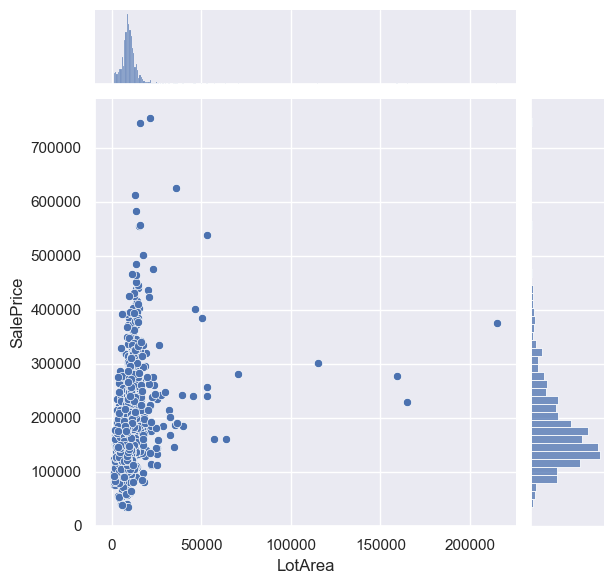

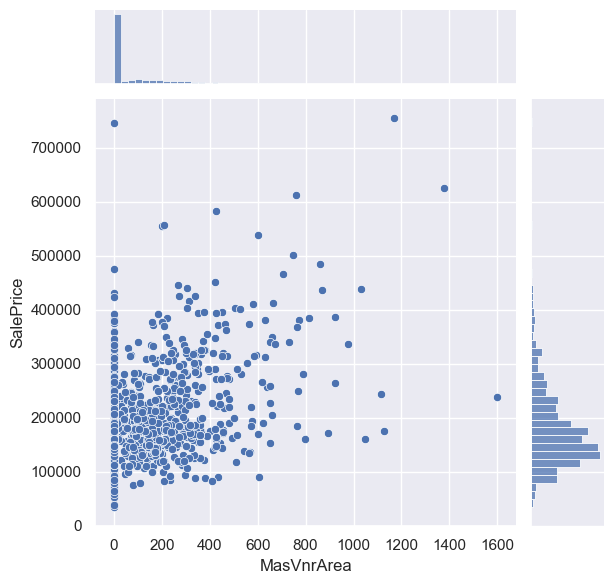

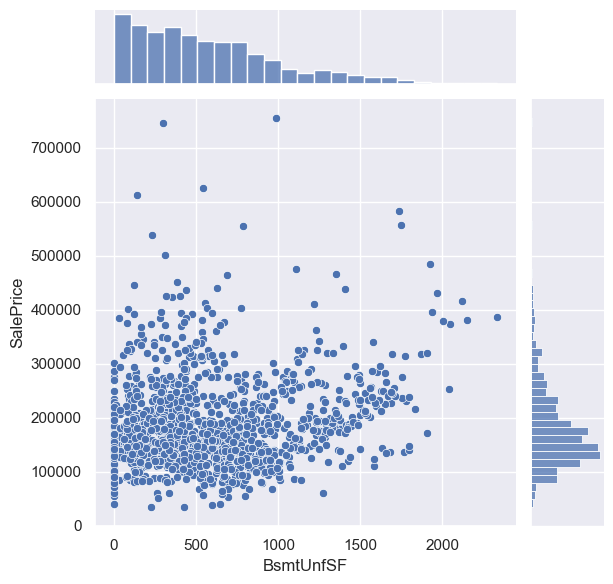

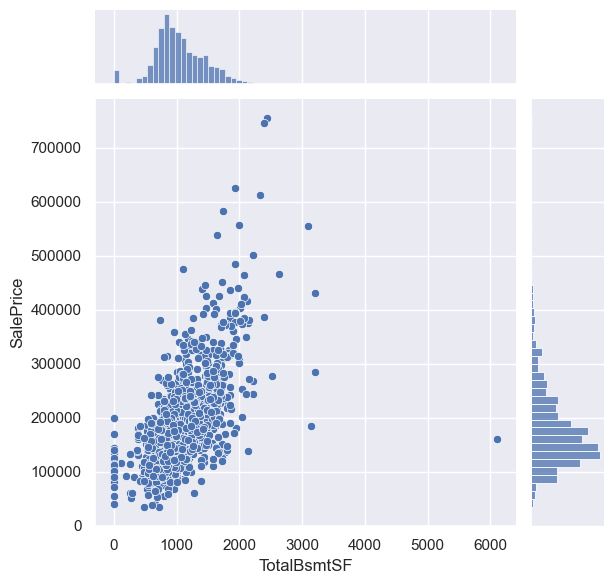

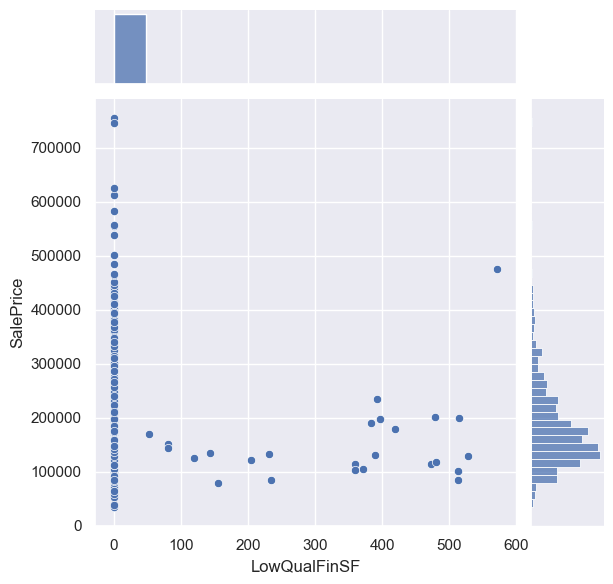

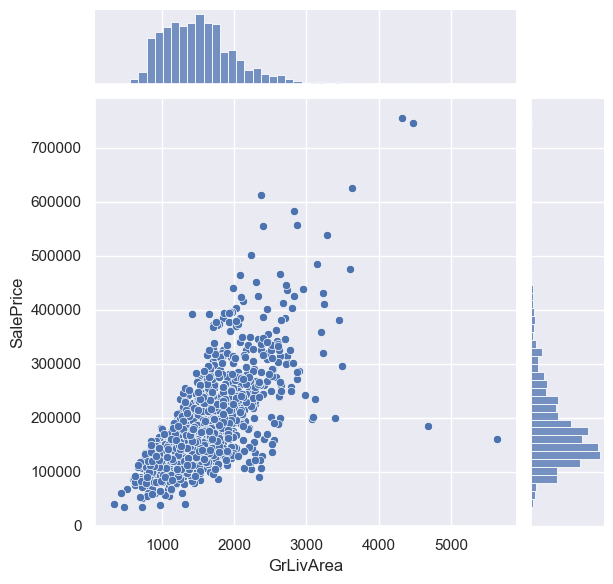

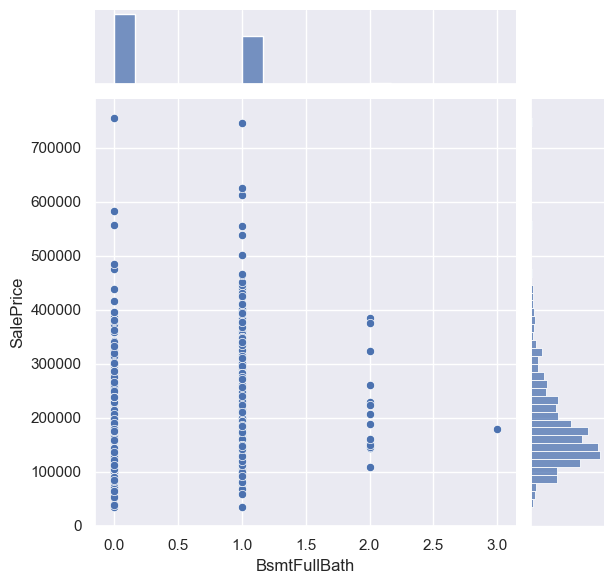

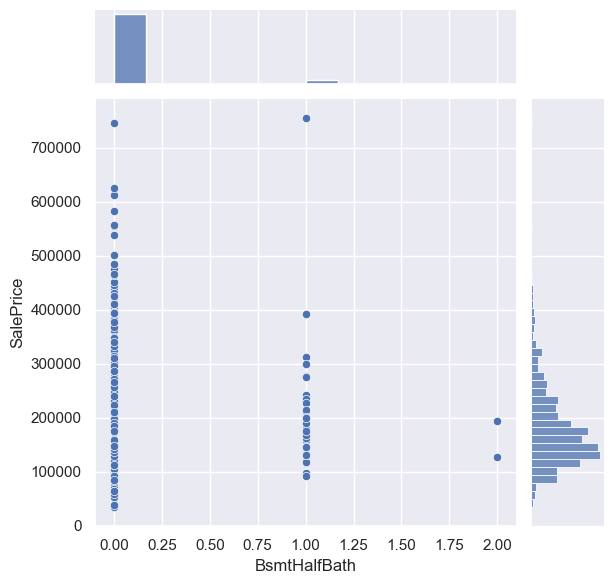

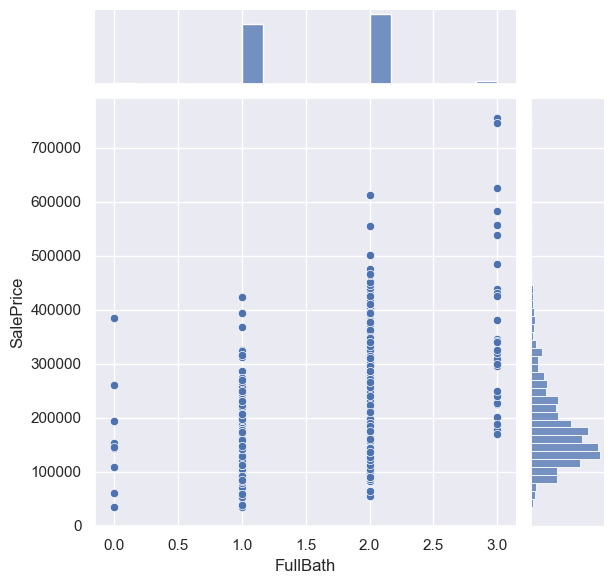

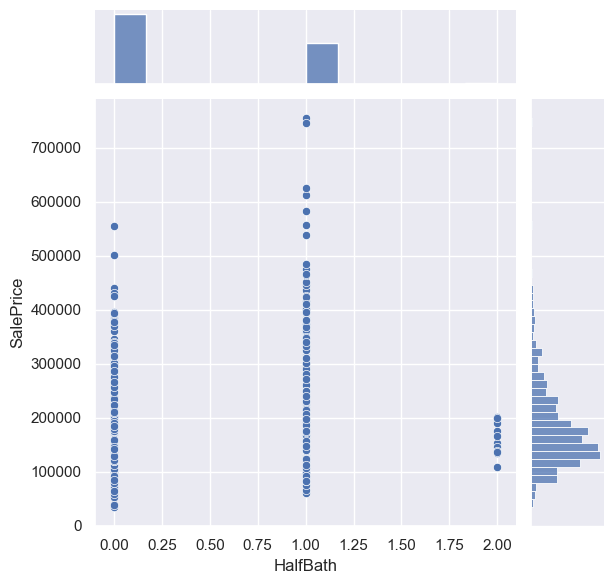

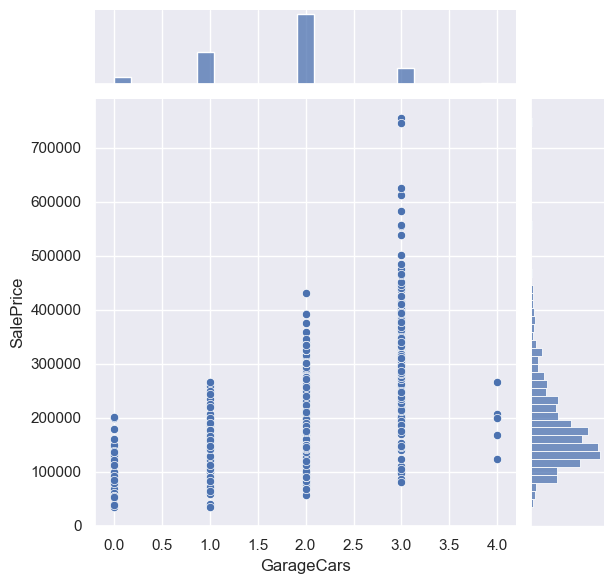

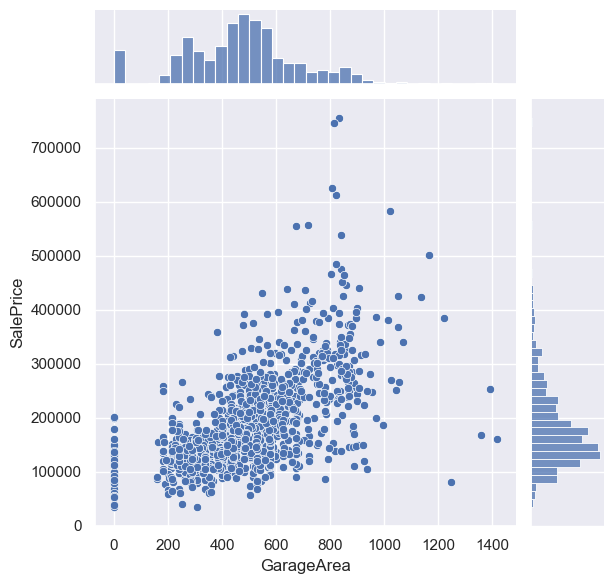

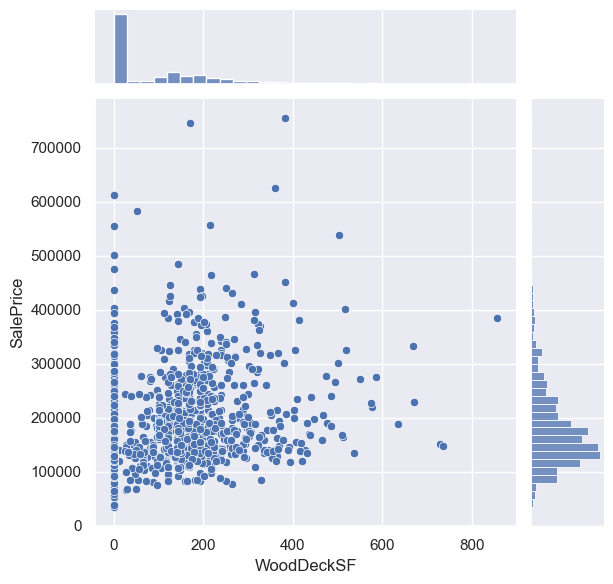

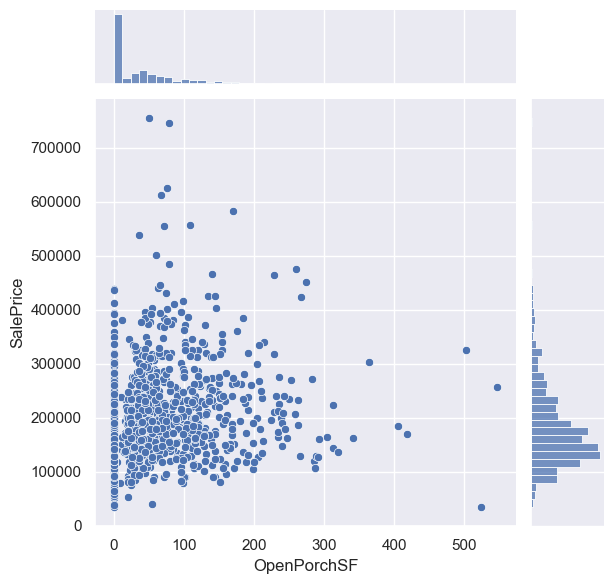

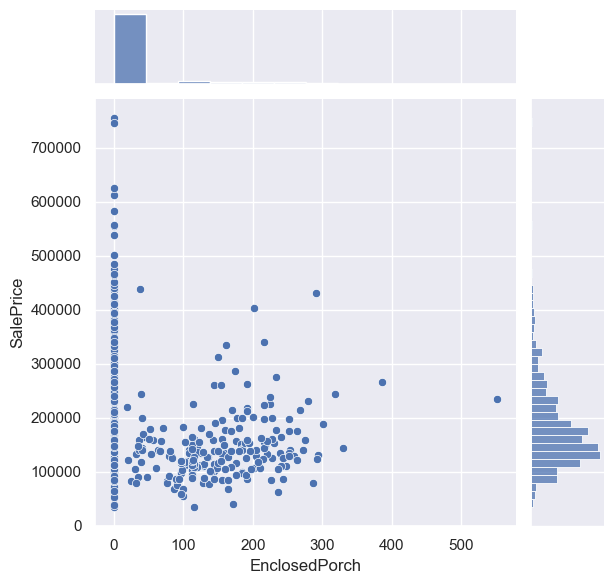

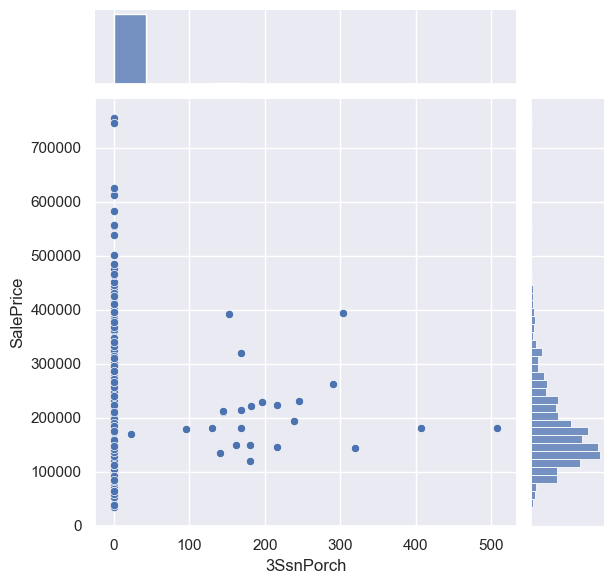

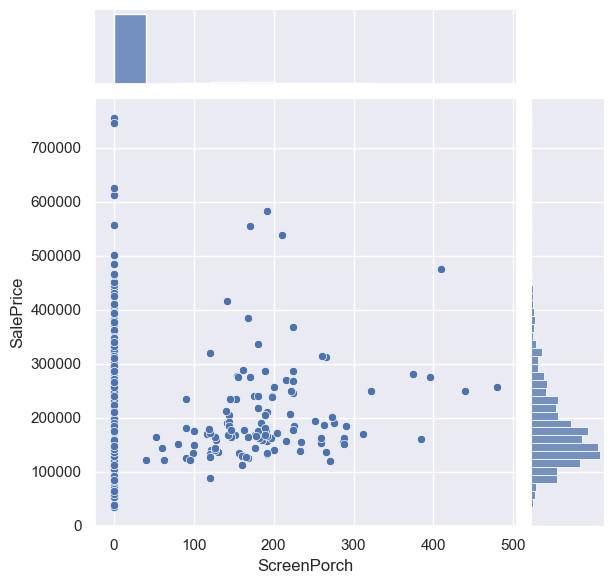

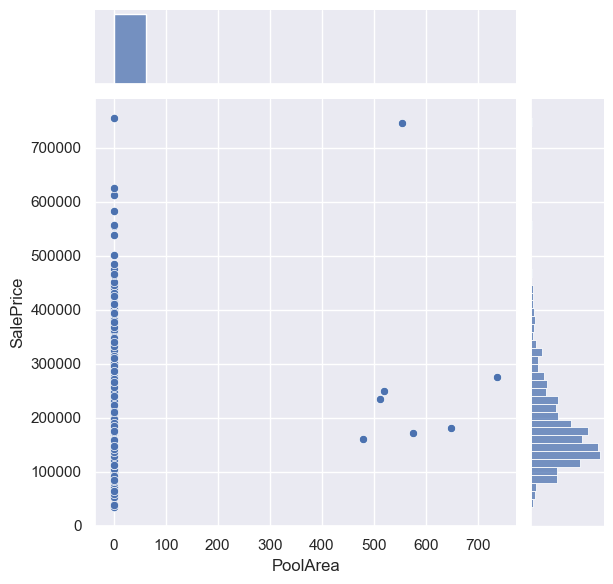

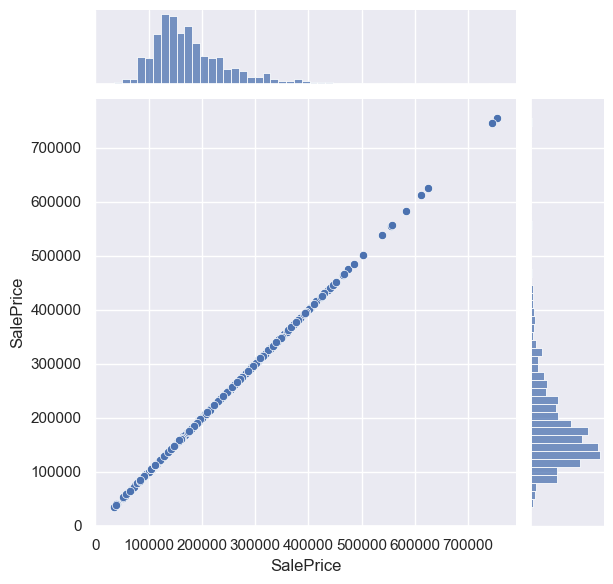

In [127]:
plt.close()
f2, axes2 = plt.subplots(len(numeric_data1.columns), 1, figsize=(18, 24))

count=0
for var in numeric_data1.columns.tolist():
    plt.close()
    sb.jointplot(data=numeric_data1, x=str(var), y='SalePrice', ax=count)
    count += 1
    plt.show()

